# Extracting Numbers from a Sudoku


### Importing Libraries

In [1]:
import cv2
from imutils.contours import sort_contours
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Helper Function to display images

In [2]:
def show(img):
    plt.figure()
    plt.imshow(img, cmap='gray')

#### Helper Function to save images

In [3]:
def save_images(numbers):
    for i in range(len(numbers)):
        img = numbers[i]
        filename = str(i) + ".jpg"
        cv2.imwrite("number_images/" + filename, img)
        show(img)

### Reading the image

In [4]:
image = cv2.imread('SudokuImages/Sudoku4.jpg')
image = cv2.resize(image, (640, 640))
# show(image)

### Converting image to grayscale

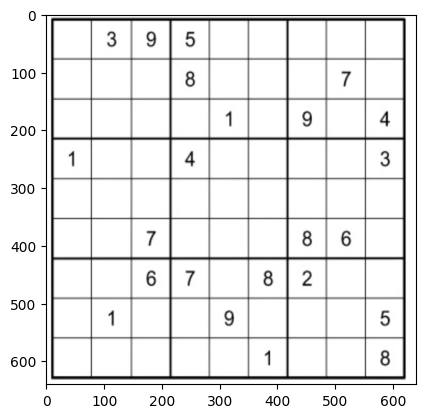

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show(gray)

### Thresholding the image

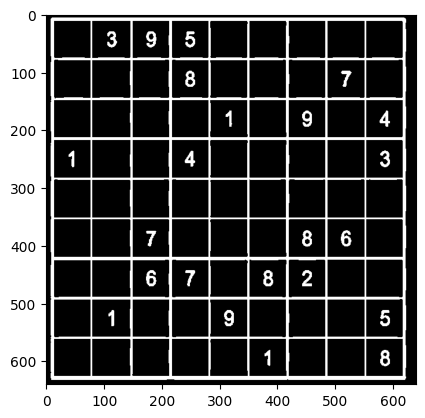

In [6]:
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,57,5)
img_thresh = np.copy(thresh)
show(img_thresh)

### Find Contours and fill small contours (numbers, noise)

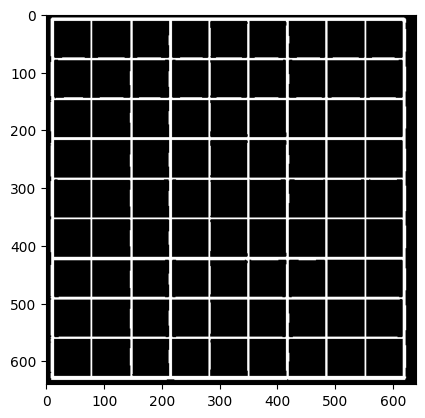

In [7]:
conts, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for contour in conts:
    area = cv2.contourArea(contour)
    if area < 1200:
        cv2.drawContours(thresh, [contour], -1, (0,0,0), -1)
show(thresh)

### Make Edges more Distinct

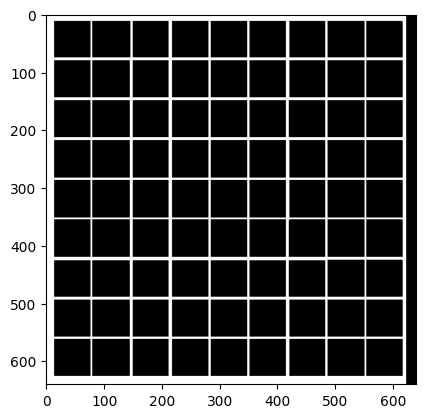

In [8]:
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,5))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, vertical_kernel, iterations=9)
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,1))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, horizontal_kernel, iterations=4)
show(thresh)

### Inverting Image

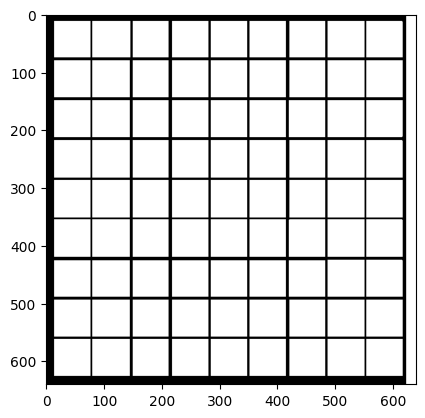

In [9]:
invert = 255 - thresh
show(invert)

### Finding Contours again to extract cell contours while excluding outline rectangles and noise

In [10]:
contours, hierarchy = cv2.findContours(invert, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = [cnt for cnt in contours if cv2.contourArea(cnt) < 8000 and cv2.contourArea(cnt) > 2000]

### Drawing extracted contours for better visualization

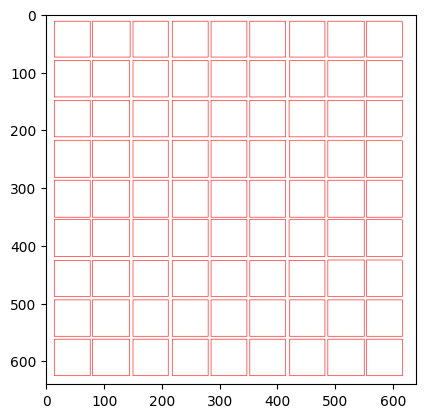

In [11]:
white = np.ones((640, 640, 3), np.uint8) * 255
for cnt in contours:
    cv2.drawContours(white, [cnt], -1, (255, 0, 0), 1)
show(white)

### Getting Bounding Rectangles of each contour

In [12]:
rects = [cv2.boundingRect(cnt) for cnt in contours]
# print(len(contours))

### Drawing Bounding Rectangles for better visualization

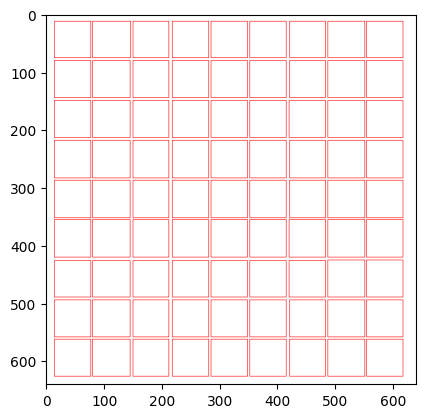

In [13]:
white = np.ones((640, 640, 3), np.uint8) * 255
for rect in rects:
    x, y, w, h = rect
    cv2.rectangle(white, (x, y), (x+w, y+h), (255, 0, 0), 1)
show(white)

### Sorting the bounding rectangles in a left-to-right, top-to-bottom fashion

In [14]:
rects = sorted(rects, key= lambda roi: (roi[1]))
for i in range(9):
    rects[9*i : 9*(i+1)] = sorted(rects[9*i : 9*(i+1)], key= lambda roi: (roi[0]))

### Extracting cells from grayscale image

In [15]:
numbers = []
for roi in rects:
    x, y, w, h = roi
    num = img_thresh[y:y+h,x:x+w]
    numbers.append(num)

### Saving the extracted cells into the number_images directory

C:\Users\artha\AppData\Local\Temp\ipykernel_13004\1243565884.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


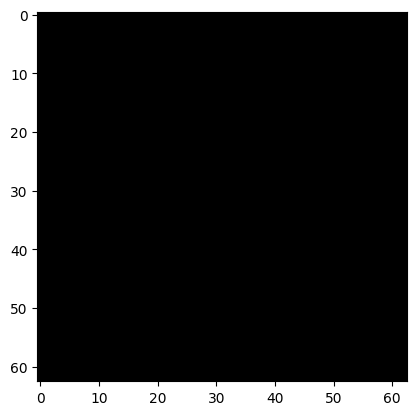

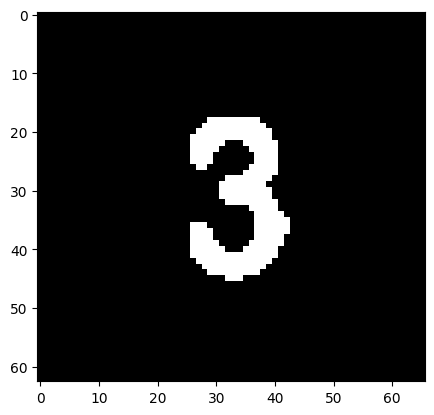

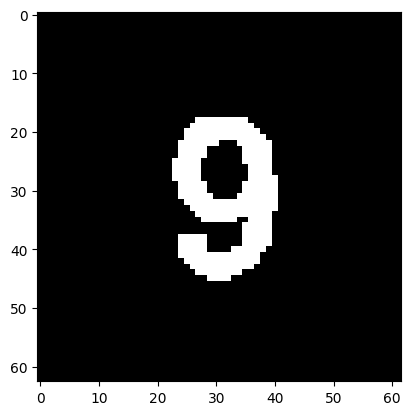

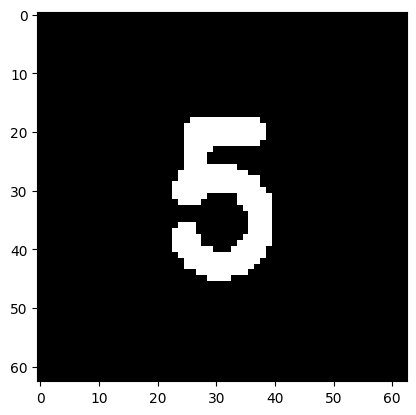

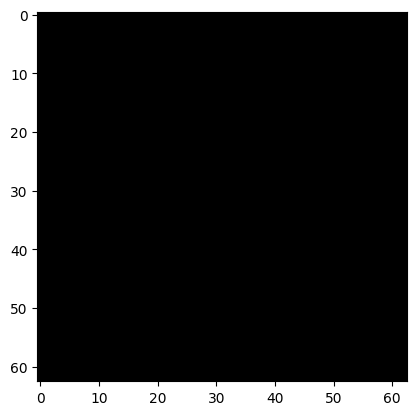

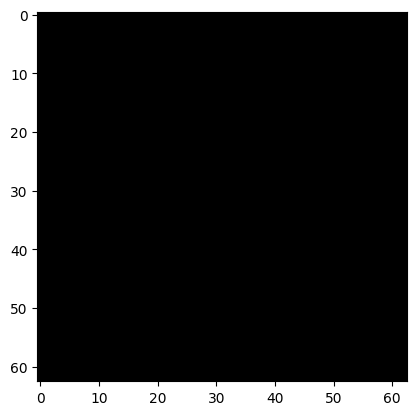

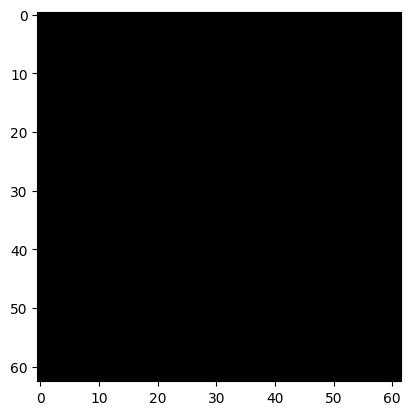

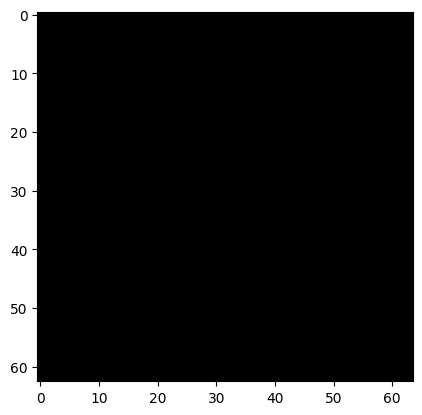

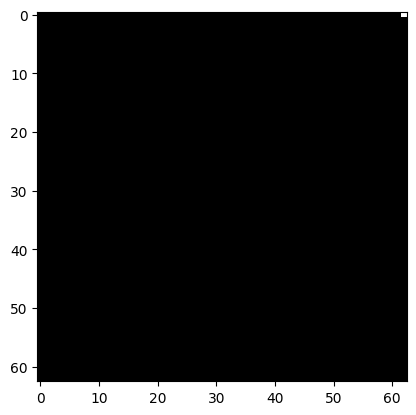

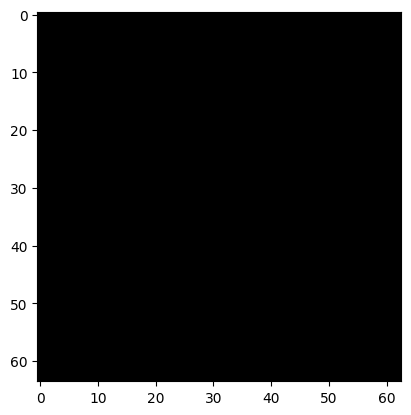

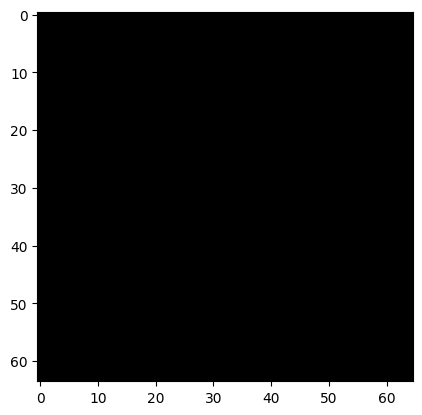

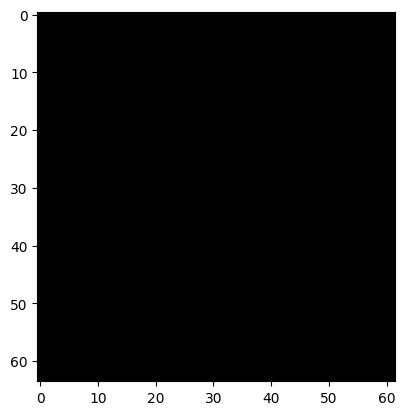

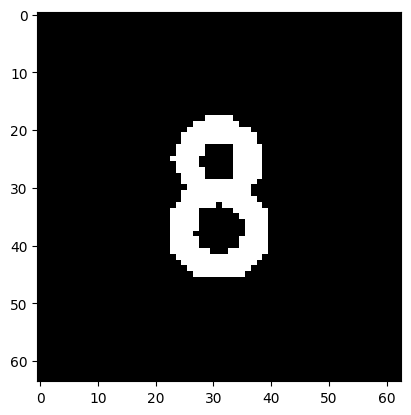

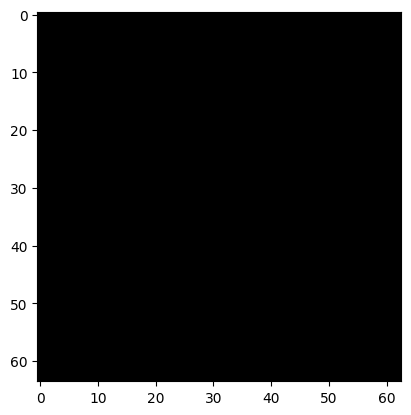

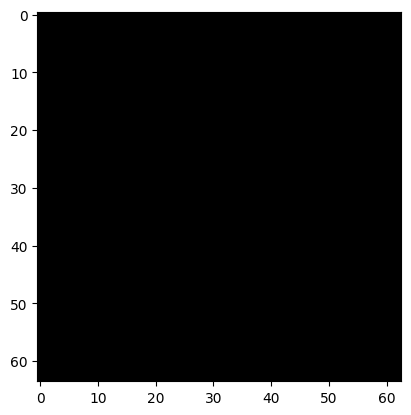

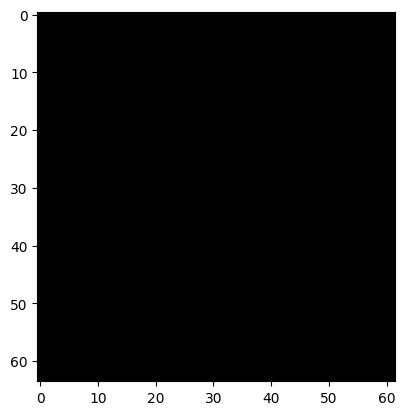

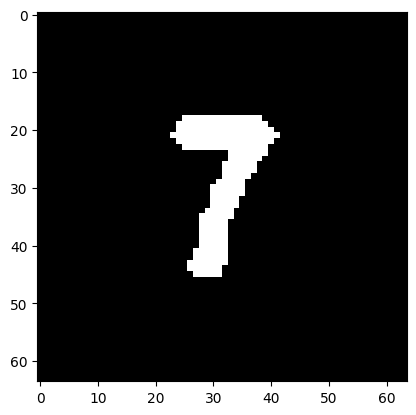

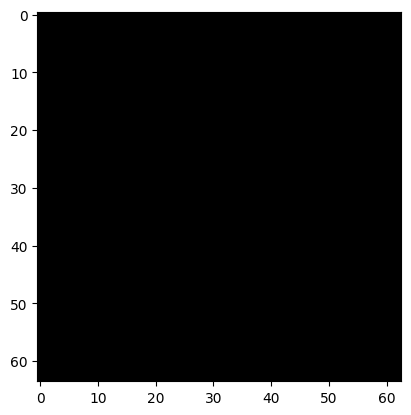

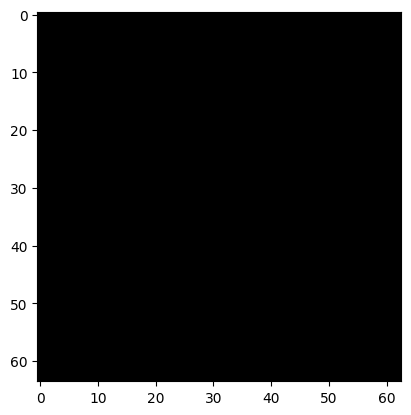

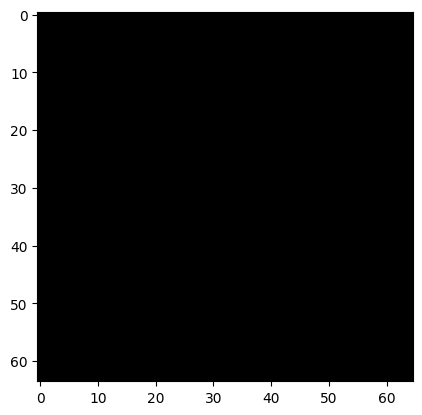

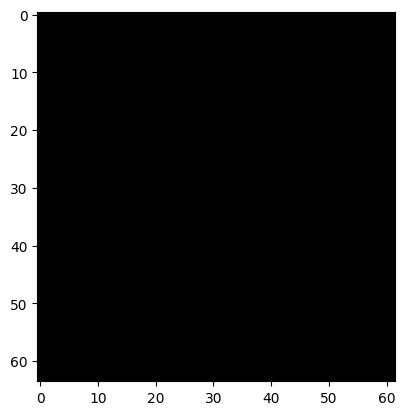

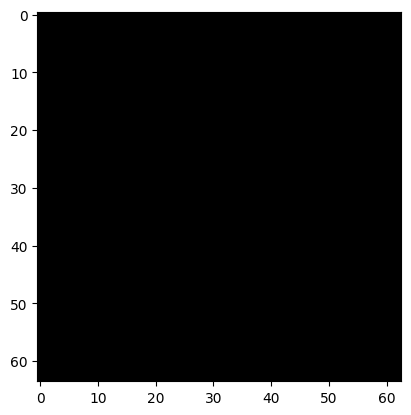

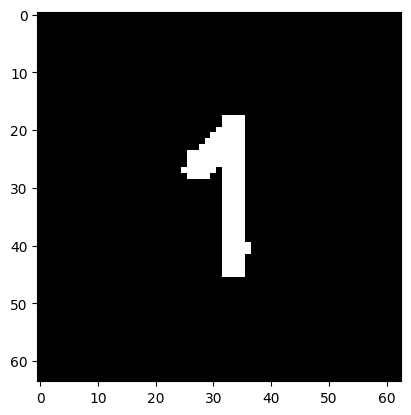

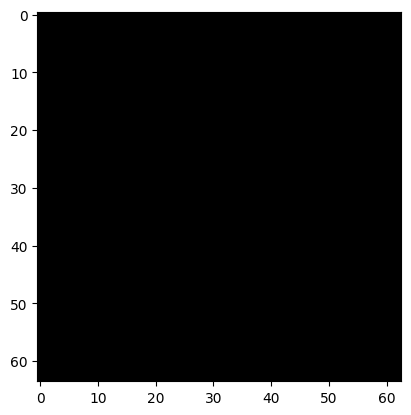

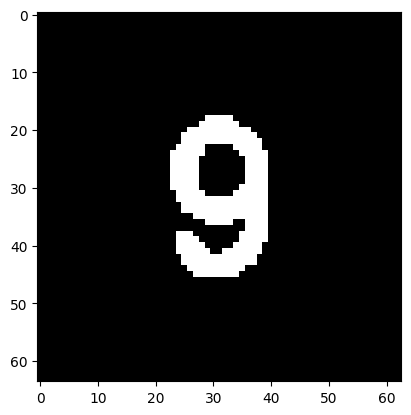

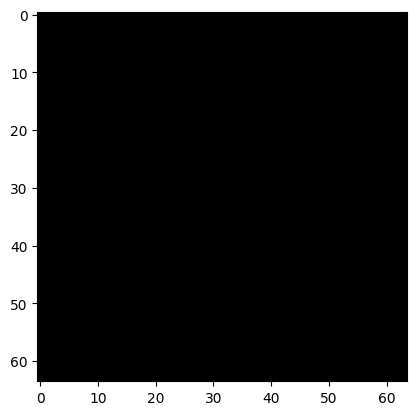

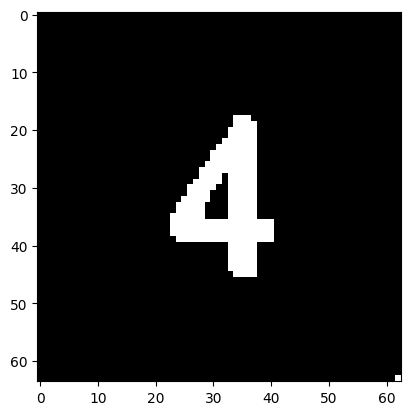

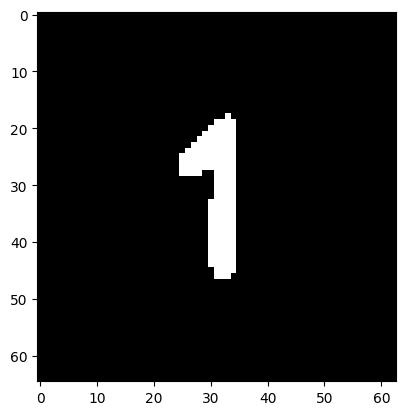

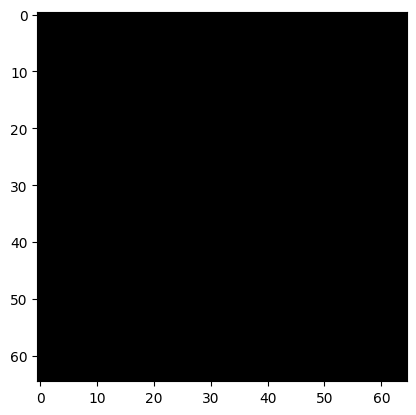

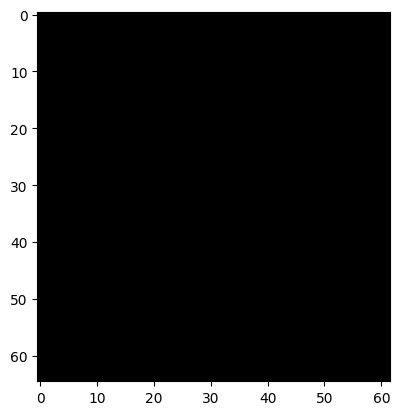

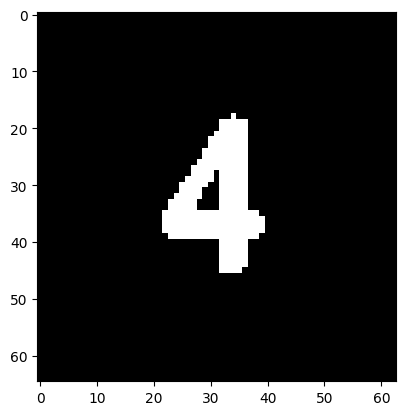

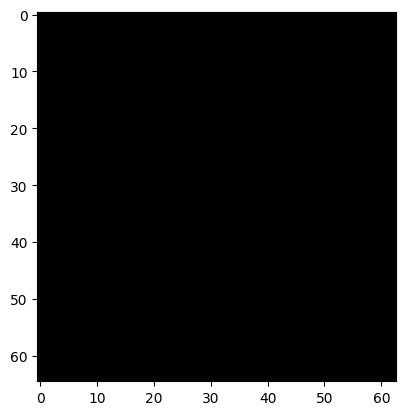

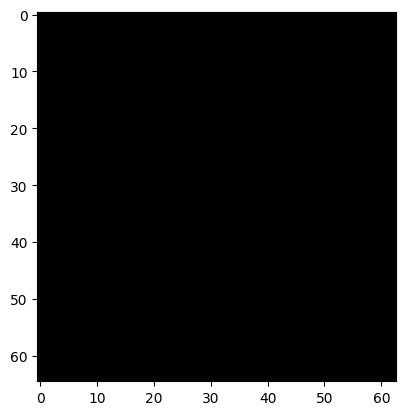

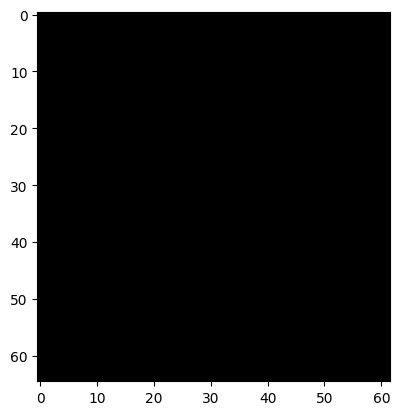

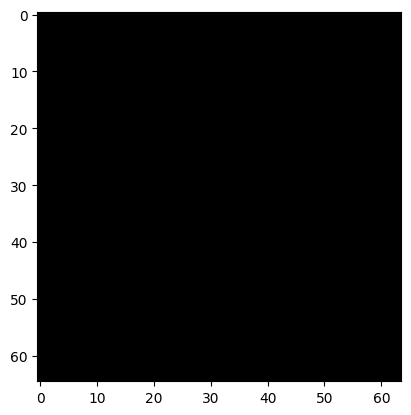

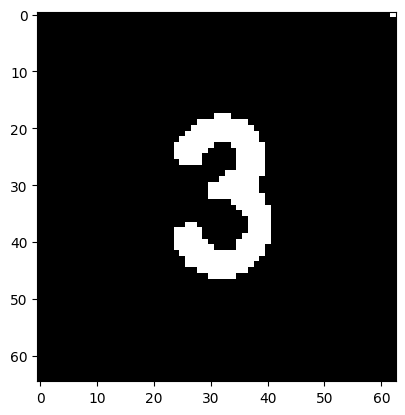

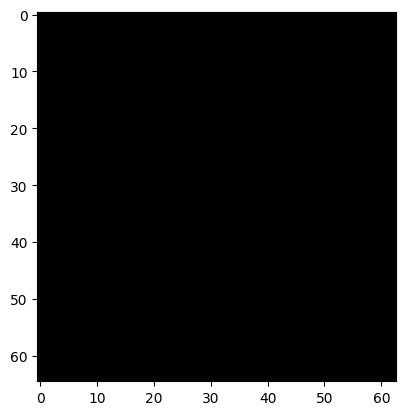

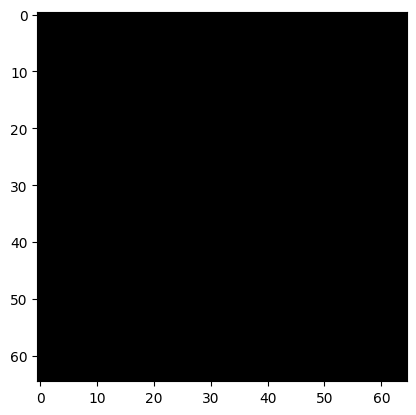

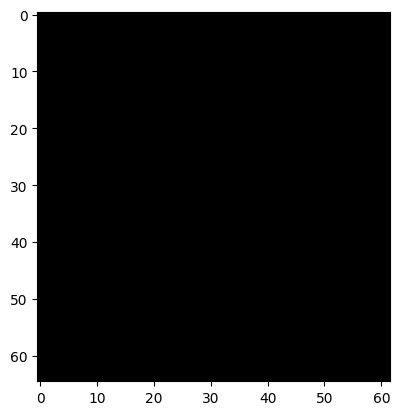

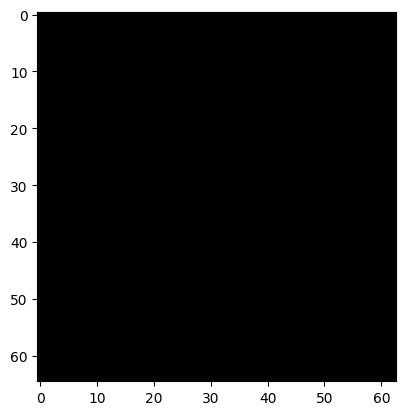

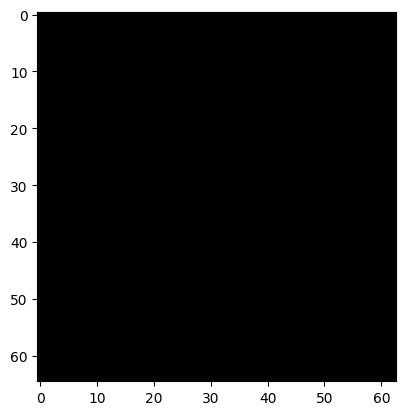

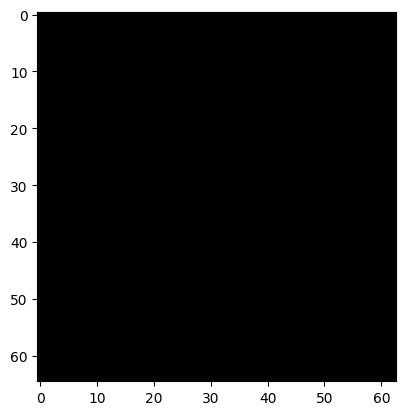

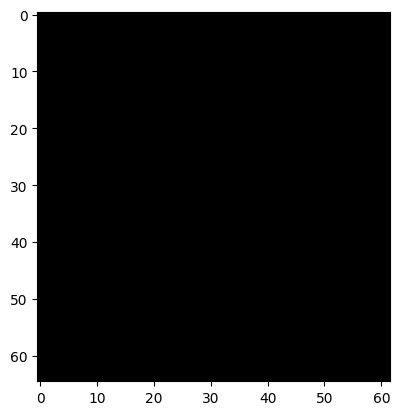

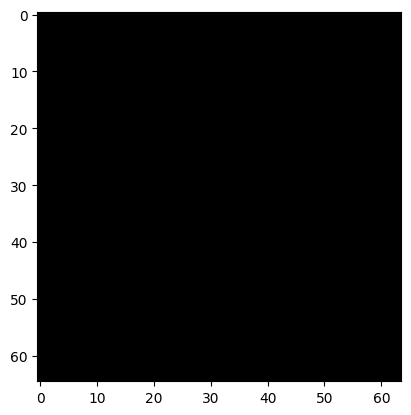

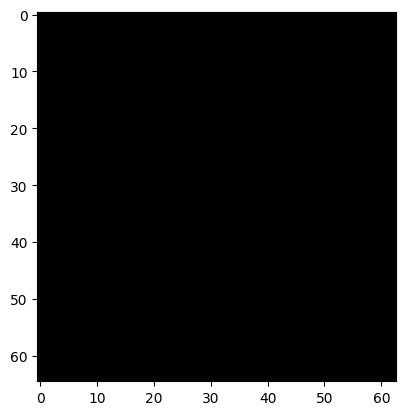

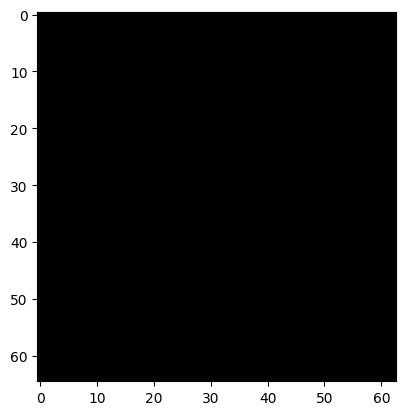

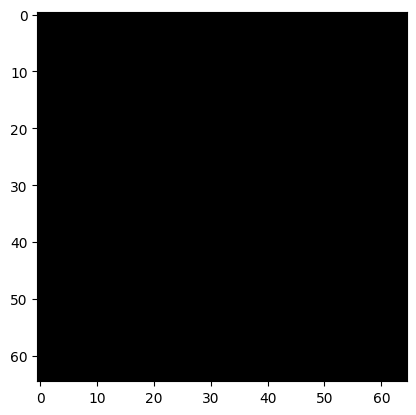

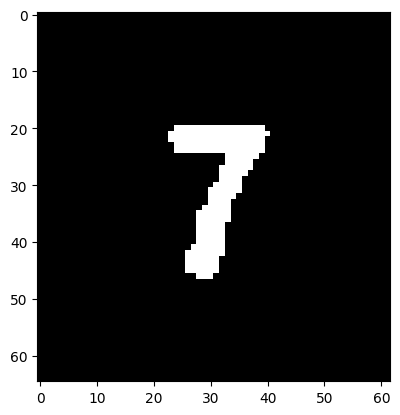

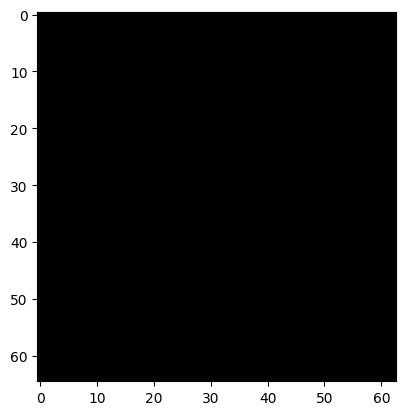

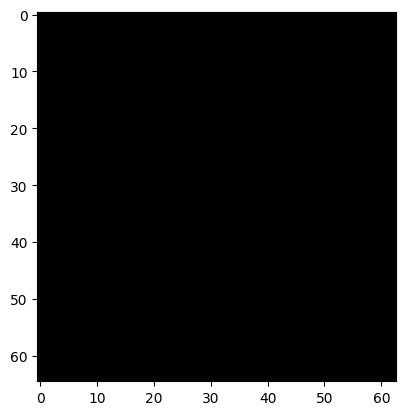

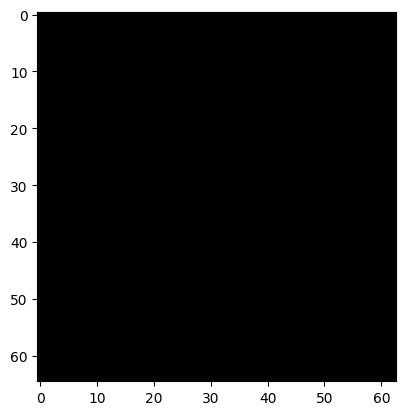

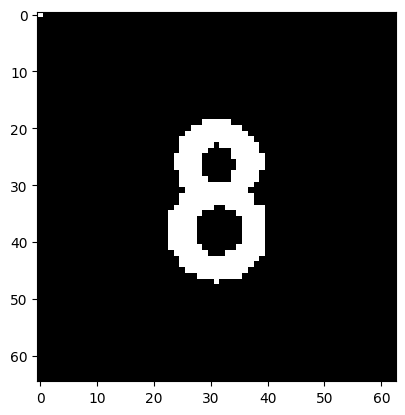

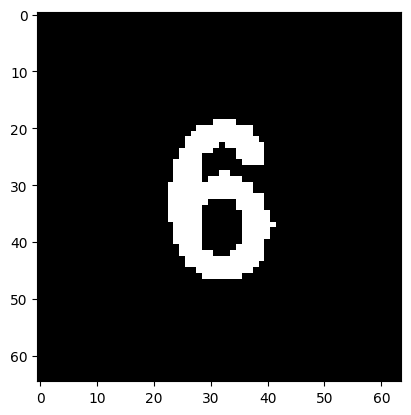

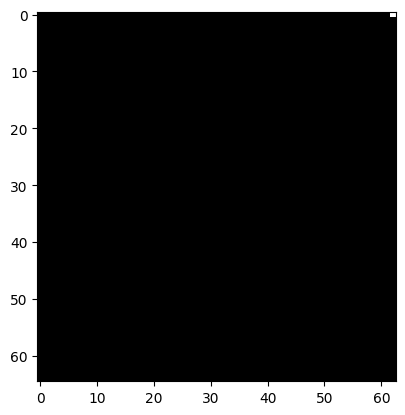

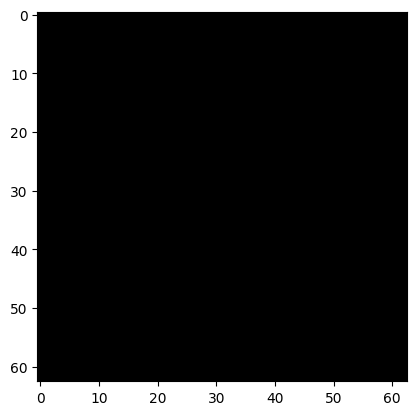

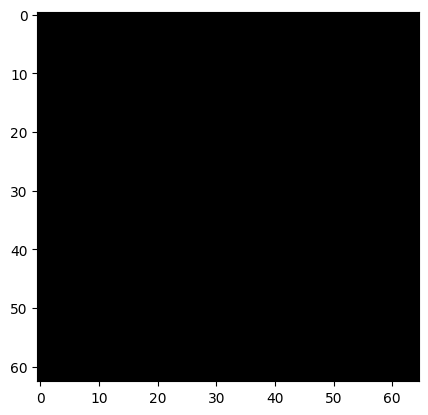

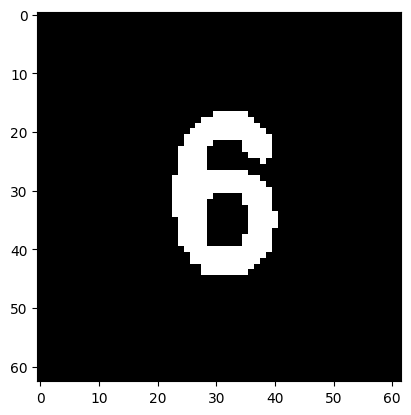

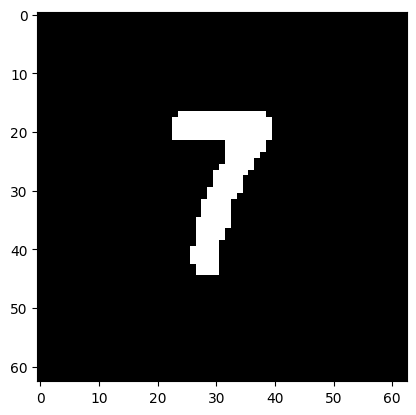

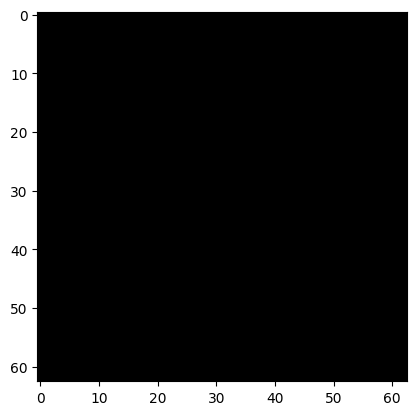

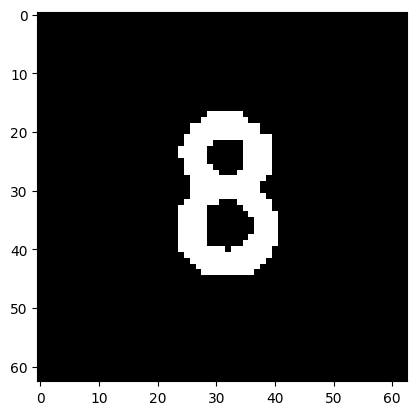

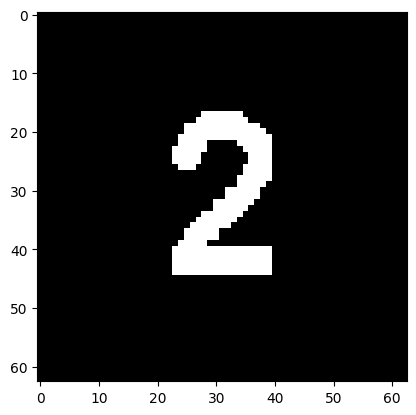

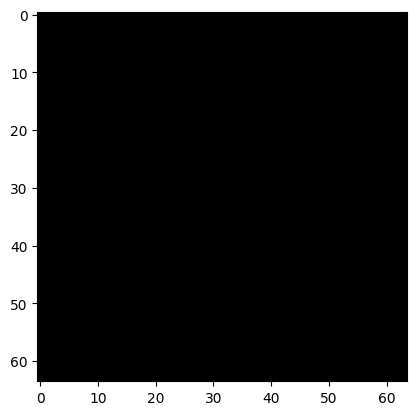

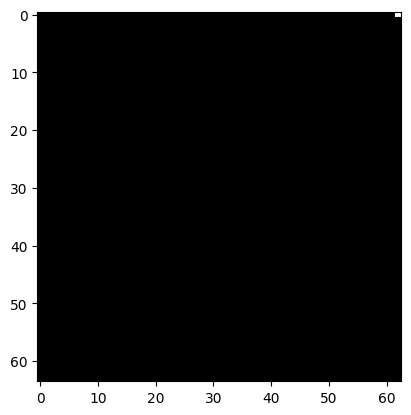

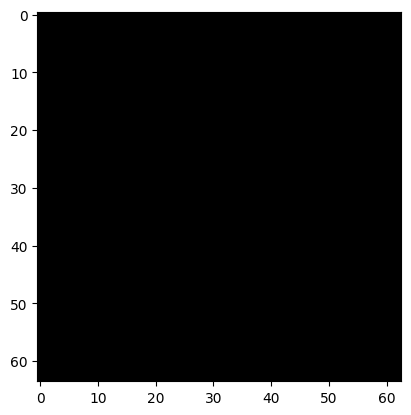

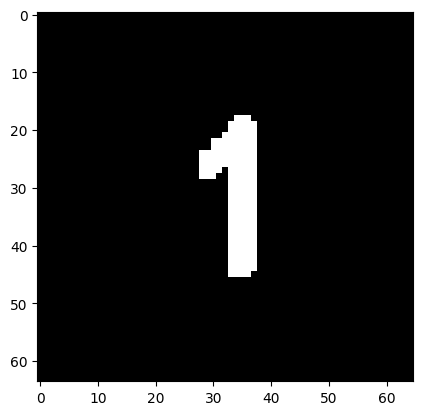

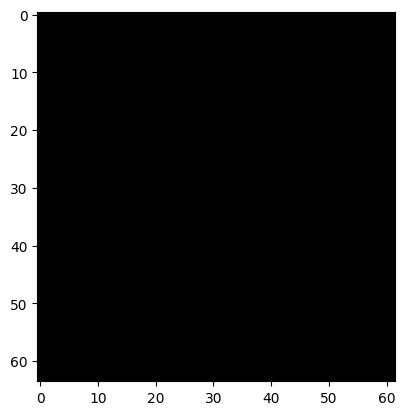

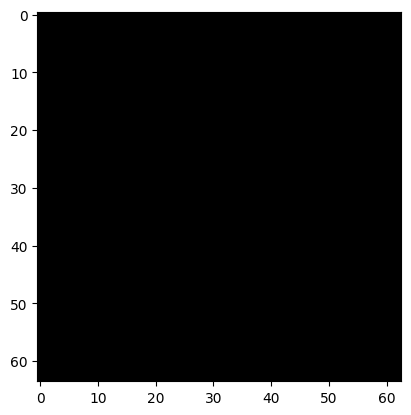

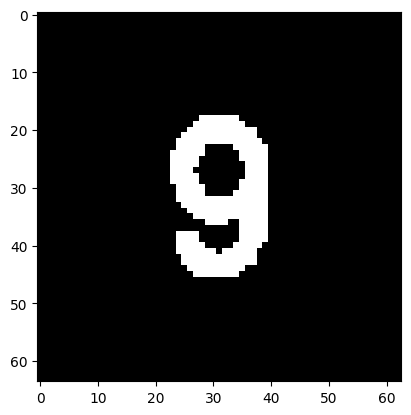

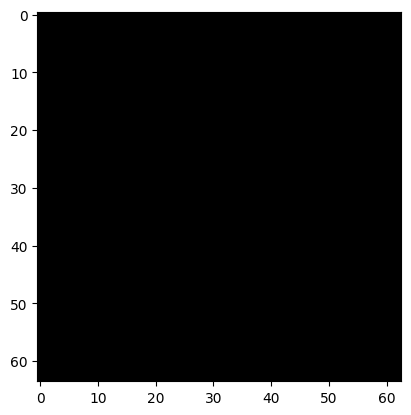

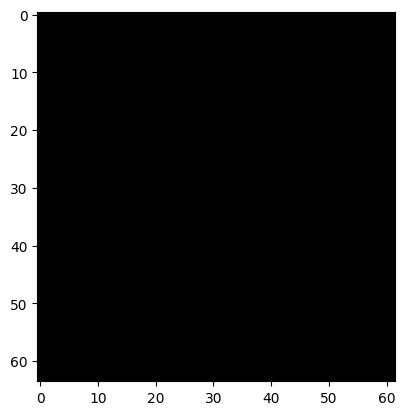

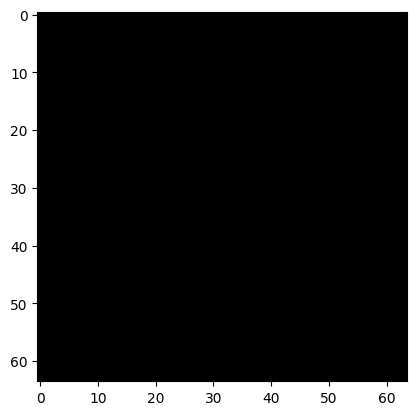

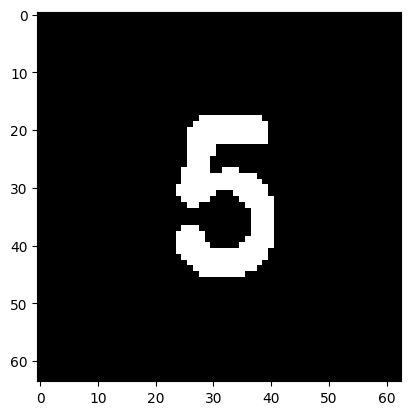

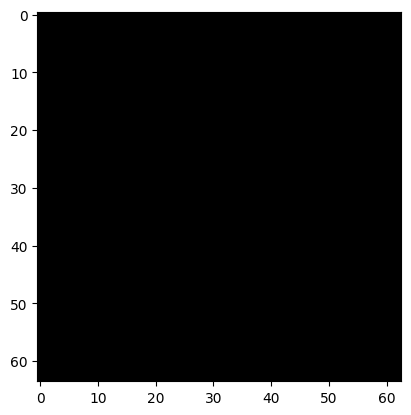

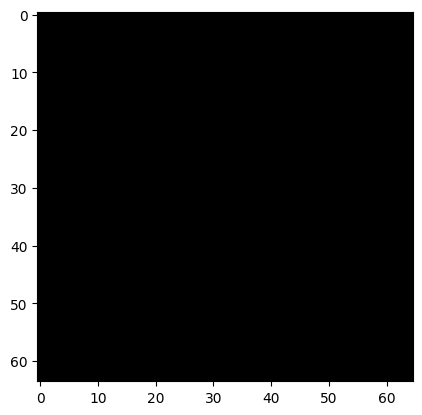

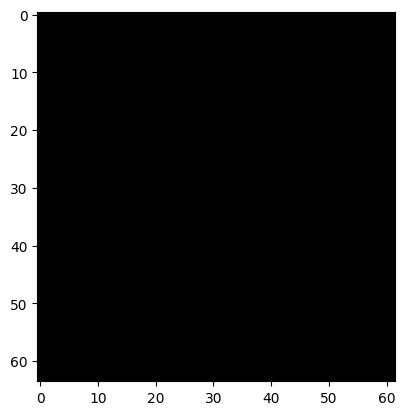

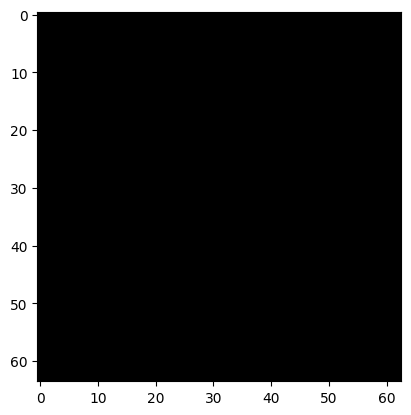

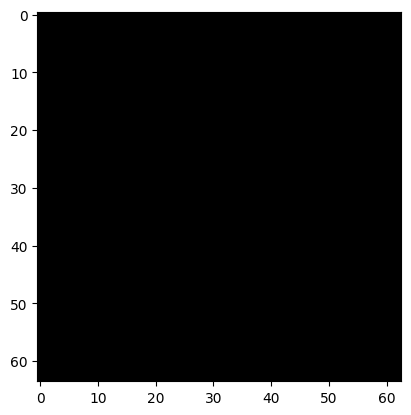

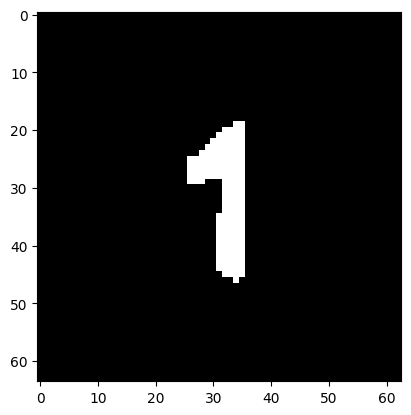

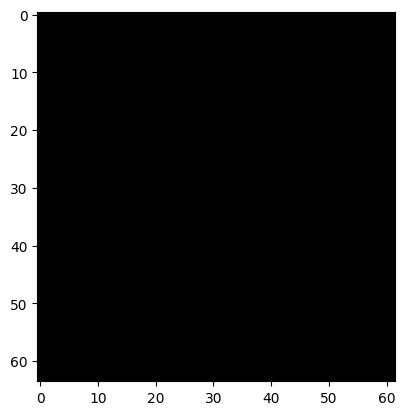

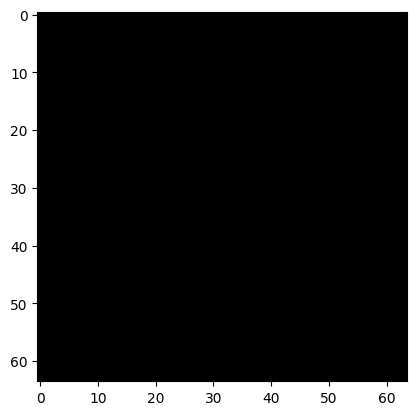

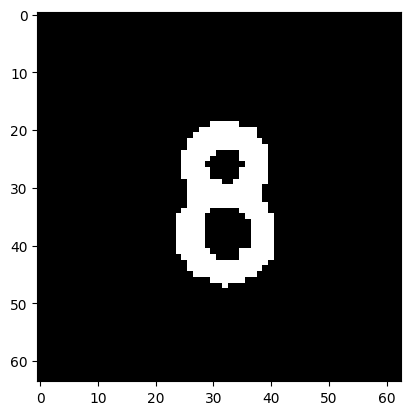

In [16]:
save_images(numbers)